# ФУНКЦИОНАЛ

In [119]:
import math
import random
import itertools
import matplotlib.pyplot as plt
from typing import Iterator, Tuple
from functools import partial

In [120]:
def gen_rectangle(width=1, height=1, space_between=1, start_x=0, start_y=0):
  for i in itertools.count():
    x = start_x + i * (width + space_between)
    yield ((x, start_y), (x, start_y + height), (x + width, start_y + height), (x + width, start_y))

def gen_triangle(width=1, height=1, space_between=1, start_x=0, start_y=0):
  for i in itertools.count():
    x = start_x + i * (width + space_between)
    yield ((x, start_y), (x + (width / 2), start_y + height), (x + width, start_y))

def gen_hexagon(width=1, height=1, space_between=1, start_x=0, start_y=0):
  for i in itertools.count():
    x = start_x + i * (width + space_between)
    yield ((x, start_y + (height / 2)), (x + (width / 3), start_y + height), (x + 2 * (width / 3), start_y + height), (x + width, start_y + (height / 2)), (x + 2 * (width / 3), start_y), (x + (width / 3), start_y))

def get_figures(polygons, amount=10):
  return list(itertools.islice(polygons, amount))

def visualize_polygons(*polygons_lines):
    fig, ax = plt.subplots()
    colors = itertools.cycle(['black', 'red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta'])

    for polygons in polygons_lines:
        color = next(colors)
        for polygon in polygons:
            x, y = zip(*polygon)
            x += (x[0],)
            y += (y[0],)
            ax.plot(x, y, color=color)

    ax.set_aspect('equal')
    plt.grid(True, linestyle='--', color='gray', alpha=0.3)
    plt.show()

In [121]:
def tr_translate(dx=0, dy=0):
    def transform_polygon(polygon):
        return tuple((x + dx, y + dy) for (x, y) in polygon)
    return transform_polygon

def tr_rotate(angle_deg=0, center=(0, 0)):
    def transform_polygon(polygon):
        cx, cy = center
        angle_rad = math.radians(angle_deg)
        cos_a = math.cos(angle_rad)
        sin_a = math.sin(angle_rad)
        rotated = []
        for x, y in polygon:
            new_x = cx + (x - cx) * cos_a - (y - cy) * sin_a
            new_y = cy + (x - cx) * sin_a + (y - cy) * cos_a
            rotated.append((new_x, new_y))
        return tuple(rotated)
    return transform_polygon

def tr_symmetry(axis='x'):
    def transform_polygon(polygon):
        if axis.lower() == 'y':
            return tuple((x, -y) for x, y in polygon)
        elif axis.lower() == 'x':
            return tuple((-x, y) for x, y in polygon)
        else:
            raise ValueError("Use x or y axis")
    return transform_polygon

def tr_homothety(k, center=(0, 0)):
    def transform_polygon(polygon):
        cx, cy = center
        scaled = []
        for x, y in polygon:
            new_x = cx + k * (x - cx)
            new_y = cy + k * (y - cy)
            scaled.append((new_x, new_y))
        return tuple(scaled)
    return transform_polygon

def tr_homothety_increasing_element(k_start=1.0, k_step=0.1, center=(0, 0)):
    current_k = k_start
    def transform(polygon):
        nonlocal current_k
        transformer = tr_homothety(current_k, center)
        result = transformer(polygon)
        current_k += k_step
        return result
    return transform

In [122]:
import math
import itertools

def min_side_length(polygon):
    min_length = float('inf')
    n = len(polygon)

    for i in range(n):
        p1 = polygon[i]
        p2 = polygon[(i+1) % n]
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        length = math.sqrt(dx*dx + dy*dy)
        if length < min_length:
            min_length = length

    return min_length

def polygon_area(polygon):
    n = len(polygon)
    area = 0.0
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i+1) % n]
        area += x1*y2 - x2*y1
    return abs(area) / 2.0

def vector_dot(a, b):
    return a[0]*b[0] + a[1]*b[1]

def vector_cross(a, b):
    return a[0]*b[1] - a[1]*b[0]

def vector_length(a):
    return math.sqrt(a[0]**2 + a[1]**2)

def vector_sub(a, b):
    return (a[0]-b[0], a[1]-b[1])

def is_convex(polygon):
    n = len(polygon)
    if n < 3:
        return False

    sign = 0
    for i in range(n):
        a = polygon[i]
        b = polygon[(i+1) % n]
        c = polygon[(i+2) % n]

        ab = vector_sub(b, a)
        bc = vector_sub(c, b)

        cross = vector_cross(ab, bc)

        if abs(cross) < 1e-10:
            continue

        if sign == 0:
            sign = 1 if cross > 0 else -1
        else:
            if (sign == 1 and cross < 0) or (sign == -1 and cross > 0):
                return False

    return True

def point_in_convex_polygon(point, polygon):
    n = len(polygon)
    if n < 3:
        return False

    initial_sign = 0
    for i in range(n):
        a = polygon[i]
        b = polygon[(i+1) % n]
        ab = vector_sub(b, a)
        ap = vector_sub(point, a)
        cross = vector_cross(ab, ap)
        if abs(cross) < 1e-10:
            continue

        sign = 1 if cross > 0 else -1

        if initial_sign == 0:
            initial_sign = sign
        elif sign != initial_sign:
            return False

    return True

def side_length(p1, p2):
    return vector_length(vector_sub(p2, p1))

def perimeter(polygon):
    return sum(side_length(polygon[i], polygon[(i + 1) % len(polygon)]) for i in range(len(polygon)))

def distance_to_origin(p):
    return vector_length(p)

In [123]:
#1
def flt_convex_polygon(polygon):
    return is_convex(polygon)

#2
def flt_angle_point(point):
    def filter_func(polygon):
        for vertex in polygon:
            if math.isclose(vertex[0], point[0], abs_tol=1e-9) and math.isclose(vertex[1], point[1], abs_tol=1e-9):
                return True
        return False
    return filter_func

#3
def flt_square(max_area):
    def filter_func(polygon):
        return polygon_area(polygon) < max_area
    return filter_func

#4
def flt_short_side(max_length):
    def filter_func(polygon):
        return min_side_length(polygon) < max_length
    return filter_func

#5
def flt_point_inside(point):
    def filter_func(polygon):
        if not is_convex(polygon):
            return False
        return point_in_convex_polygon(point, polygon)
    return filter_func

#6
def flt_polygon_angles_inside(target_polygon):
    def filter_func(polygon):
        if not is_convex(polygon):
            return False
        for vertex in target_polygon:
            if point_in_convex_polygon(vertex, polygon):
                return True
        return False
    return filter_func

In [124]:
#1
def agr_origin_nearest(p1, p2):
    p1_nearest = min(p1, key=distance_to_origin)
    p2_nearest = min(p2, key=distance_to_origin)
    if distance_to_origin(p1_nearest) <= distance_to_origin(p2_nearest):
      return p1
    return p2

#2
def agr_max_side(p1, p2):
    def max_side(polygon):
        return max(side_length(polygon[i], polygon[(i + 1) % len(polygon)]) for i in range(len(polygon)))
    if max_side(p1) >= max_side(p2):
      return p1
    return p2

#3
def agr_min_area(p1, p2):
    if polygon_area(p1) <= polygon_area(p2):
      return p1
    return p2

#4
def agr_perimeter(cur, poly):
    return cur + perimeter(poly)

#5
def agr_area(cur, poly):
    return cur + polygon_area(poly)

In [133]:
from functools import wraps

#декораторы поворотов итд

def translate_decorator(dx=0, dy=0):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return tr_translate(dx, dy)(polygons)
        return wrapper
    return decorator

def rotate_decorator(angle_degrees, center=None):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return tr_rotate(angle_degrees, center)(polygons)
        return wrapper
    return decorator

def symmetry_decorator(axis='x', reflection_point=(0, 0)):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return tr_symmetry(axis)(polygons)
        return wrapper
    return decorator

def homothety_decorator(scale_factor, center=None):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return tr_homothety(scale_factor, center)(polygons)
        return wrapper
    return decorator


In [134]:
from functools import wraps

#фильтродекораторы

def convex_filter_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        polygons = func(*args, **kwargs)
        return list(filter(is_convex, polygons))
    return wrapper

def angle_point_filter_decorator(point):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            def has_point(polygon):
                return any(
                    math.isclose(x, point[0], abs_tol=1e-9) and math.isclose(y, point[1], abs_tol=1e-9)
                    for x, y in polygon
                )
            return list(filter(has_point, polygons))
        return wrapper
    return decorator

def area_filter_decorator(max_area):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return list(filter(lambda poly: polygon_area(poly) < max_area, polygons))
        return wrapper
    return decorator

def short_side_filter_decorator(max_length):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return list(filter(lambda poly: min_side_length(poly) < max_length, polygons))
        return wrapper
    return decorator

def point_inside_filter_decorator(point):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            return list(filter(lambda poly: is_convex(poly) and point_in_convex_polygon(point, poly), polygons))
        return wrapper
    return decorator

def polygon_angles_inside_filter_decorator(target_polygon):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = func(*args, **kwargs)
            def contains_any_vertex(poly):
                if not is_convex(poly):
                    return False
                return any(point_in_convex_polygon(vertex, poly) for vertex in target_polygon)
            return list(filter(contains_any_vertex, polygons))
        return wrapper
    return decorator


# ПРИМЕРЫ

In [145]:
rect = get_figures(gen_rectangle())
tria = get_figures(gen_triangle())
hexa = get_figures(gen_hexagon(width=2))

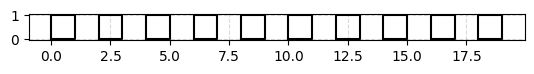

In [146]:
visualize_polygons(rect)

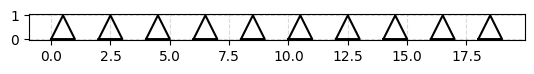

In [147]:
visualize_polygons(tria)

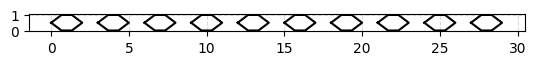

In [148]:
visualize_polygons(hexa)

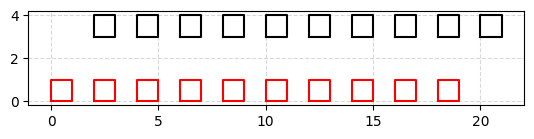

In [128]:
rect_translated = list(map(tr_translate(2, 3), rect))
visualize_polygons(rect_translated, rect)

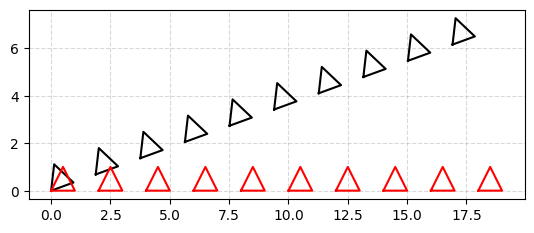

In [70]:
tria_rotated = list(map(tr_rotate(20), tria))
visualize_polygons(tria_rotated, tria)

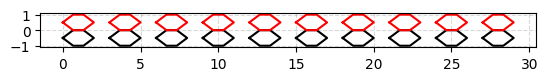

In [71]:
hexa_symmentry = list(map(tr_symmetry('y'), hexa))
visualize_polygons(hexa_symmentry, hexa)

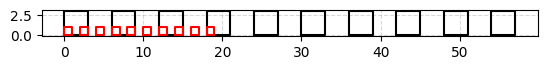

In [72]:
rect_homotety = list(map(tr_homothety(3), rect))
visualize_polygons(rect_homotety, rect)

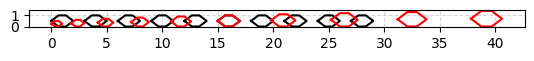

In [74]:
hexa_inc = list(map(tr_homothety_increasing_element(k_start=0.5, k_step=0.1), hexa))
visualize_polygons(hexa, hexa_inc)

три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс

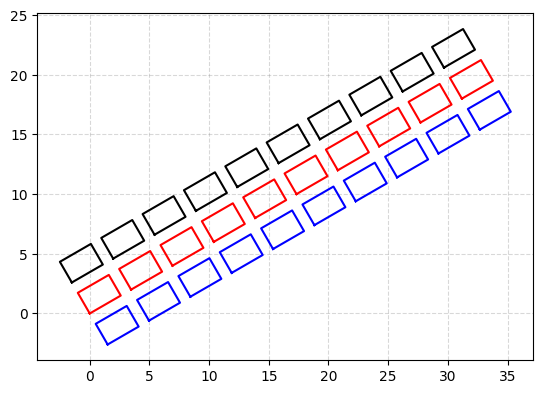

In [75]:
rect = get_figures(gen_rectangle(width=3, height=2, space_between=1), 10)

rect1 = list(map(tr_rotate(30), map(tr_translate(dy=3), rect)))
rect2 = list(map(tr_rotate(30), map(tr_translate(dy=0), rect)))
rect3 = list(map(tr_rotate(30), map(tr_translate(dy=-3), rect)))

visualize_polygons(rect1, rect2, rect3)

две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат

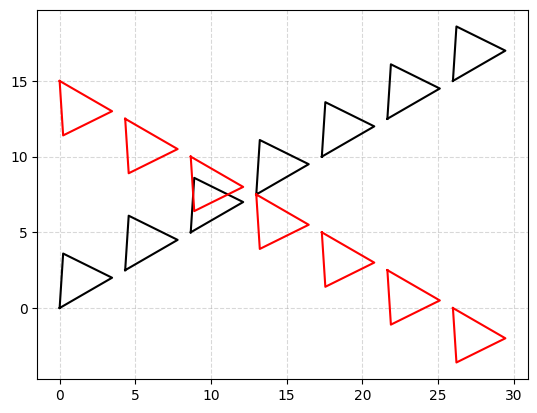

In [76]:
tria = get_figures(gen_triangle(width=4, height=3), amount=7)

tria1 = list(map(tr_rotate(30), tria))
tria2 = list(map(tr_translate(dy=15), map(tr_symmetry('y'), tria1)))
visualize_polygons(tria1, tria2)

две параллельных ленты треугольников, ориентированных симметрично друг к другу

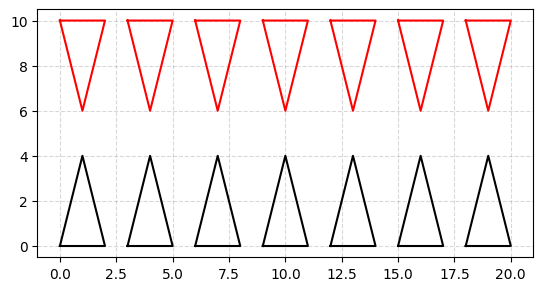

In [77]:
tria1 = get_figures(gen_triangle(width=2, height=4), amount=7)
tria2 = list(map(tr_symmetry('y'), map(tr_translate(dy=-10), tria1)))
visualize_polygons(tria1, tria2)

последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

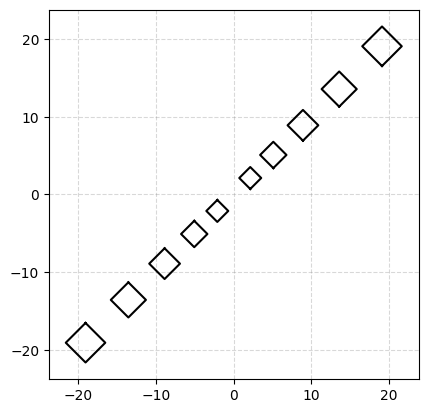

In [78]:
r = get_figures(gen_rectangle(width=2, height=2, start_x=2, start_y=-1), 5)
r1 = list(map(tr_homothety_increasing_element(1, 0.2), r))
r2 = list(map(tr_symmetry('x'), map(tr_symmetry('y'), r1)))
rects = list(map(tr_rotate(45), r1 + r2))
visualize_polygons(rects)

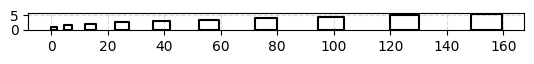

In [79]:
rectangles = list(map(tr_homothety_increasing_element(k_start=1, k_step=0.5), get_figures(gen_rectangle(width=2, height=1), 10)))
visualize_polygons(rectangles)

ФИЛЬТРАЦИИ

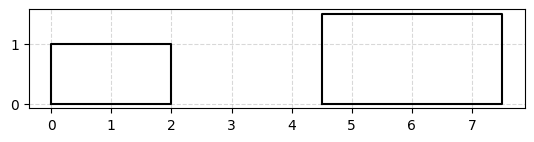

In [80]:
filtered1 = filter(flt_short_side(2), rectangles)
visualize_polygons(filtered1)

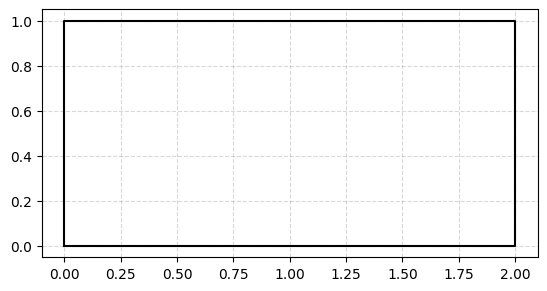

In [81]:
fil2 = filter(flt_angle_point((2, 0)), rectangles)
visualize_polygons(fil2)

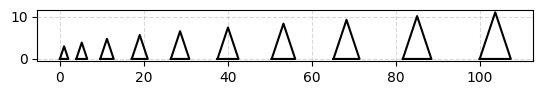

In [82]:
triangles = list(map(tr_homothety_increasing_element(1, 0.3), get_figures(gen_triangle(width=2, height=3), 10)))
visualize_polygons(triangles)

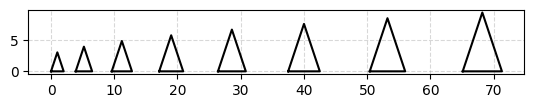

In [83]:
fil3 = filter(flt_square(30), triangles)
visualize_polygons(fil3)

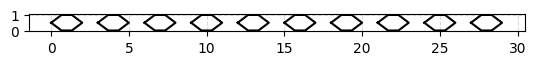

In [84]:
hexagon = get_figures(gen_hexagon(width=2))
fil4 = filter(flt_convex_polygon, hexagon)
visualize_polygons(hexagon)

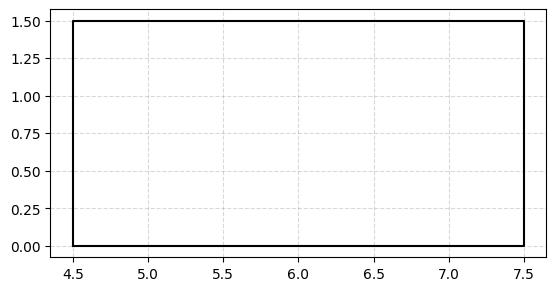

In [85]:
fil5 = filter(flt_point_inside((6, 1)), rectangles)
visualize_polygons(fil5)

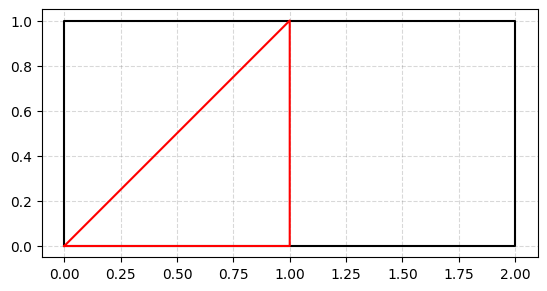

In [86]:
target_poly = ((0,0), (1,0), (1,1))
fil6 = filter(flt_polygon_angles_inside(target_poly), rectangles)
visualize_polygons(fil6, [target_poly])

фильтрацию фигур из примера полигонов, отраженных относительно начала координат

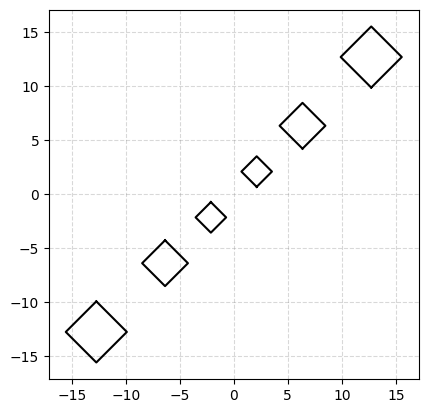

In [87]:
r = get_figures(gen_rectangle(width=2, height=2, start_x=2, start_y=-1), 10)
r1 = list(map(tr_homothety_increasing_element(1, 0.5), r))
r2 = list(map(tr_symmetry('x'), map(tr_symmetry('y'), r1)))
rects = list(map(tr_rotate(45), r1 + r2))
filtered_rects = filter(flt_short_side(4), rects)
visualize_polygons(filtered_rects)

фильтрация фигур на различных полигонах

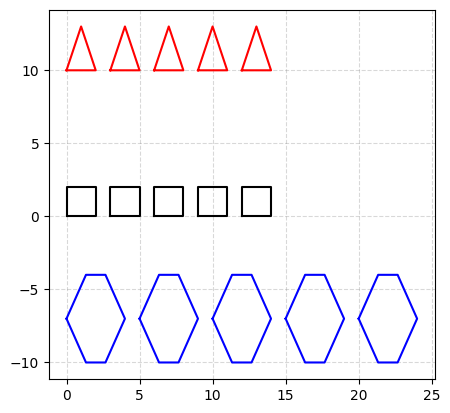

In [88]:
f1 = get_figures(gen_rectangle(width=2, height=2), 5)
f2 = get_figures(gen_triangle(width=2, height=3, start_y=10), 5)
f3 = get_figures(gen_hexagon(width=4, height=6, start_y=-10), 5)
visualize_polygons(f1, f2, f3)

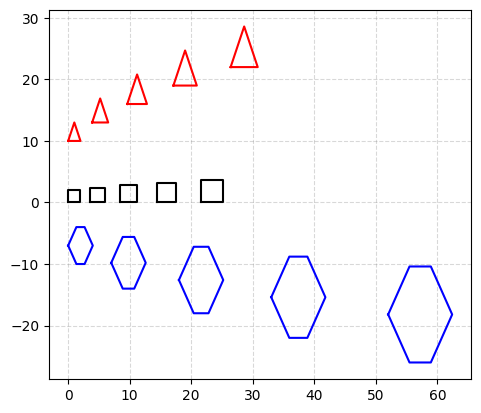

In [89]:
f11 = list(map(tr_homothety_increasing_element(1, 0.2), f1))
f22 = list(map(tr_homothety_increasing_element(1, 0.3), f2))
f33 = list(map(tr_homothety_increasing_element(1, 0.4), f3))
visualize_polygons(f11, f22, f33)

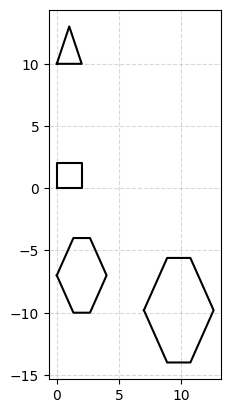

In [90]:
filtered_poly = filter(flt_short_side(2.3), f11 + f22 + f33)
visualize_polygons(filtered_poly)

фильтрация пересекающихся фигур

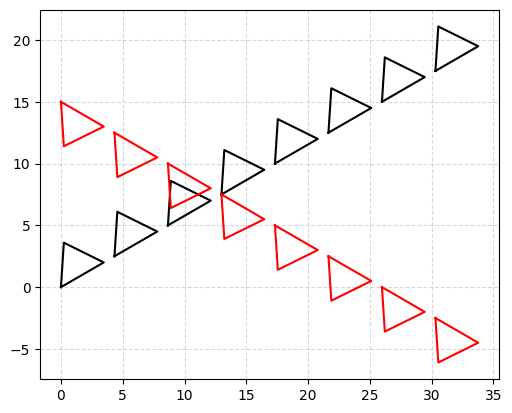

In [92]:
tria = get_figures(gen_triangle(width=4, height=3), amount=8)

tria1 = list(map(tr_rotate(30), tria))
tria2 = list(map(tr_translate(dy=15), map(tr_symmetry('y'), tria1)))
visualize_polygons(tria1, tria2)

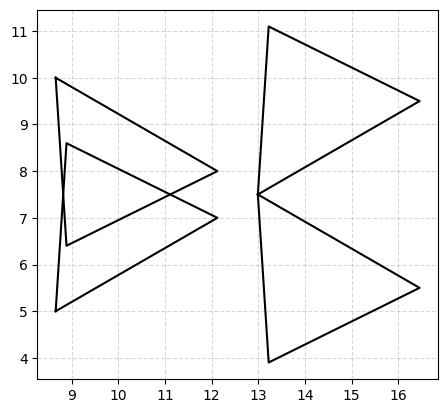

In [93]:
flt_list = []
for tr in tria1:
  f_temp = filter(flt_polygon_angles_inside(tr), tria2)
  flt_list.extend(f_temp)
for tr in tria2:
  f_temp = filter(flt_polygon_angles_inside(tr), tria1)
  flt_list.extend(f_temp)
visualize_polygons(flt_list)

функции поиска

In [116]:
polygons = get_figures(gen_rectangle(width=2, height=1), 10)
polygons = list(map(tr_homothety_increasing_element(1, 0.2), polygons))

nearest = reduce(agr_origin_nearest, polygons)
print("Самый близкий к началу координат", nearest)

max_side_poly = reduce(agr_max_side, polygons)
print("Макс сторона:", max_side_poly)

min_area_poly = reduce(agr_min_area, polygons)
print("Мин площадь:", min_area_poly)

total_perimeter = reduce(agr_perimeter, polygons, 0)
print("Суммарный периметр:", total_perimeter)

total_area = reduce(agr_area, polygons, 0)
print("Суммарная площадь:", total_area)

Самый близкий к началу координат ((0, 0), (0, 1), (2, 1), (2, 0))
Макс сторона: ((75.60000000000001, 0.0), (75.60000000000001, 2.8000000000000003), (81.2, 2.8000000000000003), (81.2, 0.0))
Мин площадь: ((0, 0), (0, 1), (2, 1), (2, 0))
Суммарный периметр: 113.99999999999997
Суммарная площадь: 78.79999999999998


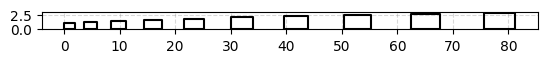

In [117]:
visualize_polygons(polygons)

декораторы

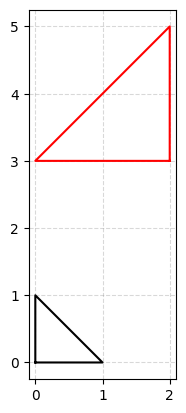

In [132]:
@translate_decorator(dx=2, dy=3)
@rotate_decorator(angle_degrees=90, center=(0, 0))
@homothety_decorator(scale_factor=2, center=(0, 0))
def create_triangle():
    return [(0, 0), (1, 0), (0, 1)]

triangle = [(0, 0), (1, 0), (0, 1)]
transformed_triangle = create_triangle()
visualize_polygons([triangle], [transformed_triangle])


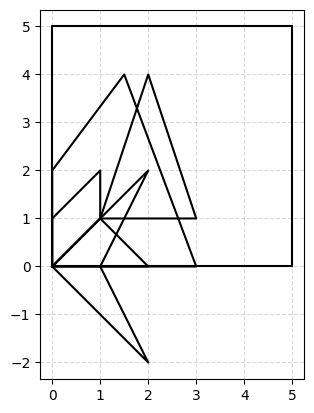

In [143]:
@convex_filter_decorator
@short_side_filter_decorator(1.5)
def get_sample_polygons():
    return [
        [(0, 0), (1, 1), (2, 0)],
        [(0, 0), (1, 1), (1, 2), (0, 1)],
        [(1, 1), (3, 1), (2, 4)],
        [(0, 0), (0, 5), (5, 5), (5, 0)],
        [(0, 0), (3, 0), (1.5, 4), (0, 2)],
        [(0, 0), (2, 2), (1, 0), (2, -2)]
    ]

polygons = [
        [(0, 0), (1, 1), (2, 0)],
        [(0, 0), (1, 1), (1, 2), (0, 1)],
        [(1, 1), (3, 1), (2, 4)],
        [(0, 0), (0, 5), (5, 5), (5, 0)],
        [(0, 0), (3, 0), (1.5, 4), (0, 2)],
        [(0, 0), (2, 2), (1, 0), (2, -2)]
    ]
filtered_polygons = get_sample_polygons()

visualize_polygons(polygons)

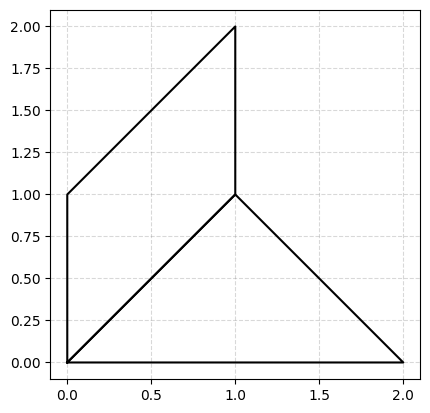

In [144]:
visualize_polygons(filtered_polygons)